<a href="https://colab.research.google.com/github/ArtemOsokin/mgpu_python_for_data_analysis/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

1. Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.
2. Определить типы и статистики колонок.
3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.
4. Определить количество игроков в каждой возрастной группе.
5. Определить самую раннюю дату подписки на сервис.
6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).
7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

1) user_id: идентификатор пользователя

2) date_served: дата события

3) marketing_channel: рекламный канал

4) variant: показанный вариант рекламы

5) converted: конверсия в покупку, 1 - пользователь совершил покупку, 0 - нет

6) language_displayed: язык рекламного сообщения

7) language_preferred: предпочитаемый пользователем язык

8) age_group: возрастная группа пользователя

9) date_subscribed: дата подписки на сервис

10) date_canceled: дата отказа от подписки

11) subscribing_channel: с какого рекламного канал пришел пользователь, когда подписался на сервис

12) is_retained: удержание, 1 - пользователь продолжает пользоваться услугами сервиса, 0 - пользователь отвалился


In [11]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.**

In [12]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Для Анализа/data/lab_5/marketing_campaign.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Для Анализа/data/lab_5/subscribers.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Для Анализа/data/lab_5/users.csv')

In [13]:
df1.shape

(10037, 6)

In [14]:
df2.shape

(10037, 5)

In [15]:
df3.shape

(10037, 3)

In [16]:
df1.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [17]:
df2.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [18]:
df3.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [19]:
# Объеденяем по user_id

temp_df_1_2b = pd.merge(df1, df2, on='user_id')
df = pd.merge(temp_df_1_2b, df3, on='user_id')

df.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English


**2. Определить типы и статистики колонок.**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   language_displayed   10037 non-null  object
 5   converted            10022 non-null  object
 6   subscribing_channel  1856 non-null   object
 7   date_subscribed      1856 non-null   object
 8   date_canceled        577 non-null    object
 9   is_retained          1856 non-null   object
 10  age_group            10037 non-null  object
 11  language_preferred   10037 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [21]:
df.describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
count,10037,10021,10022,10037,10037,10022,1856,1856,577,1856,10037,10037
unique,10037,31,5,2,4,2,5,31,115,2,7,4
top,a1000,1/15/18,House Ads,control,English,False,Instagram,1/16/18,4/2/18,True,19-24 years,English
freq,1,789,4733,5091,9793,8946,600,163,15,1279,1682,9275


**3. Определить эффективность маркетинговых каналов по привлечению платящих игроков.**


In [30]:
paying_users = df[df['converted'] == 1]

# Группировка по маркетинговому каналу
channel_grouped = paying_users.groupby('marketing_channel')

# Подсчет общего числа пользователей и платящих пользователей для каждого канала
total_users = channel_grouped['user_id'].count()
paying_users_count = channel_grouped['converted'].sum()

conversion_rate = paying_users_count / total_users

# Вывод результатов
df_mark_chan_eff = pd.DataFrame({'Total Users': total_users, 'Paying Users': paying_users_count, 'Conversion Rate': conversion_rate})

df_mark_chan_eff.sort_values('Paying Users', ascending=False)

,Total Users,Paying Users,Conversion Rate
marketing_channel,,,
House Ads,298,298,1.0
Instagram,265,265,1.0
Facebook,237,237,1.0
Email,193,193,1.0
Push,83,83,1.0


**4. Определить количество игроков в каждой возрастной группе.**


In [44]:
players_by_age_group = df.groupby('age_group')['user_id'].count().reset_index()
players_by_age_group

,age_group,user_id
0,0-18 years,1539
1,19-24 years,1682
2,24-30 years,1568
3,30-36 years,1355
4,36-45 years,1353
5,45-55 years,1353
6,55+ years,1187


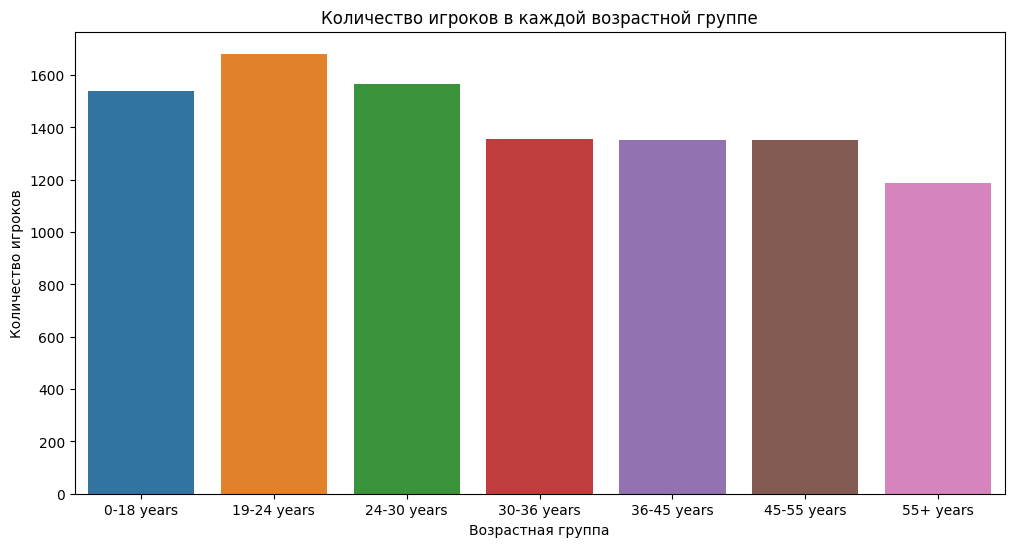

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='user_id', data=players_by_age_group)
plt.title('Количество игроков в каждой возрастной группе')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество игроков')
plt.show()

**5. Определить самую раннюю дату подписки на сервис.**

In [48]:
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])

df['date_subscribed'].min()

Timestamp('2018-01-01 00:00:00')

**6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).**

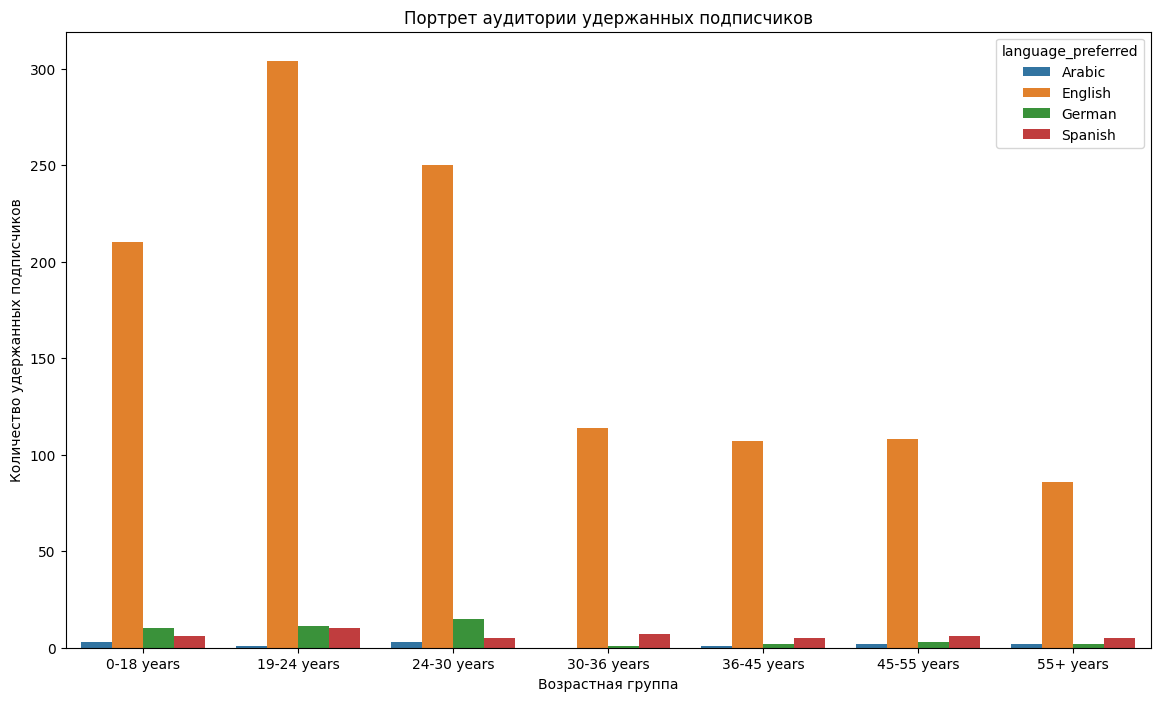

In [49]:
retained_users = df[df['is_retained'] == 1]

audience_profile = retained_users.groupby(['age_group', 'language_preferred'])['user_id'].count().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(x='age_group', y='user_id', hue='language_preferred', data=audience_profile)
plt.title('Портрет аудитории удержанных подписчиков')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество удержанных подписчиков')
plt.show()

**7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.**

**Задание 2**

Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [52]:
from scipy.optimize import linprog

In [53]:
# Целевая функция для максимизации
c = [-45, -80]  # коэффициенты при x (стулья) и y (столы)

# Коэффициенты ограничений (A*x <= b)
A = [
    [5, 20],  # материал
    [10, 15]  # человеко-часы
]

b = [400, 450]  # правые части ограничений

# Диапазоны для x (стулья) и y (столы)
x_bounds = (0, None)
y_bounds = (0, None)

In [54]:
# Решение задачи ЛП
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Вывод результатов
print("Оптимальное количество стульев (x):", round(result.x[0], 2))
print("Оптимальное количество столов (y):", round(result.x[1], 2))
print("Максимальная прибыль:", round(-result.fun, 2))

Оптимальное количество стульев (x): 24.0
Оптимальное количество столов (y): 14.0
Максимальная прибыль: 2200.0


**Задание 3**

Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 - 0.4$, day3 - 0.6$, day7 - 0.8$, day14 - 1.10$ , day21 - 1.30$, day30 - 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [55]:
import numpy as np
from scipy.optimize import curve_fit

In [56]:
# Данные
days = np.array([1, 3, 7, 14, 21, 30])
cumulative_arpu = np.array([0.4, 0.6, 0.8, 1.1, 1.3, 1.4])

In [57]:
# Аппроксимирующая кривая y = ab^x
def exponential_curve(x, a, b):
    return a * (b ** x)

In [58]:
# Аппроксимирующая кривая y = aln(x) + b
def logarithmic_curve(x, a, b):
    return a * np.log(x) + b

In [59]:
# Логарифмированные данные
log_cumulative_arpu = np.log(cumulative_arpu)

# Аппроксимация с использованием кривой y = ab^x
params_exp, covariance_exp = curve_fit(exponential_curve, days, cumulative_arpu)
a_exp, b_exp = params_exp

# Аппроксимация с использованием кривой y = aln(x) + b
params_log, covariance_log = curve_fit(logarithmic_curve, days, cumulative_arpu)
a_log, b_log = params_log

# Прогноз на 90-й день для обеих моделей
forecast_exp = exponential_curve(90, a_exp, b_exp)
forecast_log = logarithmic_curve(90, a_log, b_log)

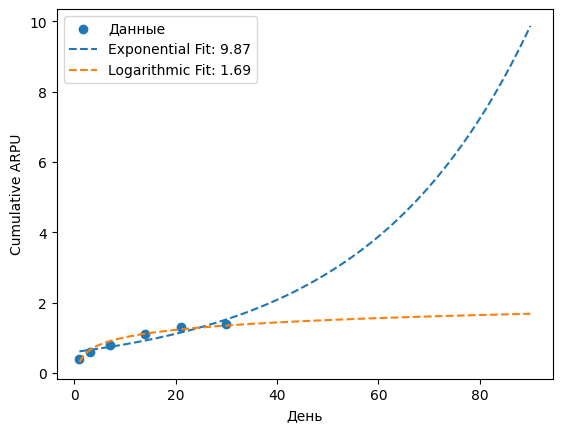

Прогноз с использованием кривой y = ab^x на 90-й день: 9.87
Прогноз с использованием кривой y = aln(x) + b на 90-й день: 1.69


In [60]:
# Визуализация результатов
x_values = np.linspace(1, 90, 100)
plt.scatter(days, cumulative_arpu, label='Данные')
plt.plot(x_values, exponential_curve(x_values, a_exp, b_exp), label=f'Exponential Fit: {forecast_exp:.2f}', linestyle='--')
plt.plot(x_values, logarithmic_curve(x_values, a_log, b_log), label=f'Logarithmic Fit: {forecast_log:.2f}', linestyle='--')
plt.xlabel('День')
plt.ylabel('Cumulative ARPU')
plt.legend()
plt.show()

# Вывод прогнозов
print(f'Прогноз с использованием кривой y = ab^x на 90-й день: {forecast_exp:.2f}')
print(f'Прогноз с использованием кривой y = aln(x) + b на 90-й день: {forecast_log:.2f}')